### loading the dataset

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_ds=pd.read_csv("training.txt",delimiter="\t")
train_ds.head(5)

,1,The Da Vinci Code book is just awesome.
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


In [10]:
pd.set_option('max_colwidth',800)
train_ds[train_ds['1']==1][0:5]

,1,The Da Vinci Code book is just awesome.
0,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
4,1,"that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course."


In [8]:
train_ds.columns

Index(['1', 'The Da Vinci Code book is just awesome.'], dtype='object')

In [11]:
train_ds[train_ds['1']==0][0:5]

,1,The Da Vinci Code book is just awesome.
3942,0,da vinci code was a terrible movie.
3943,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3944,0,"The Da Vinci Code comes out tomorrow, which sucks."
3945,0,i thought the da vinci code movie was really boring.
3946,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


### exploring the dataset

In [12]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   1                                        6917 non-null   int64 
 1   The Da Vinci Code book is just awesome.  6917 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


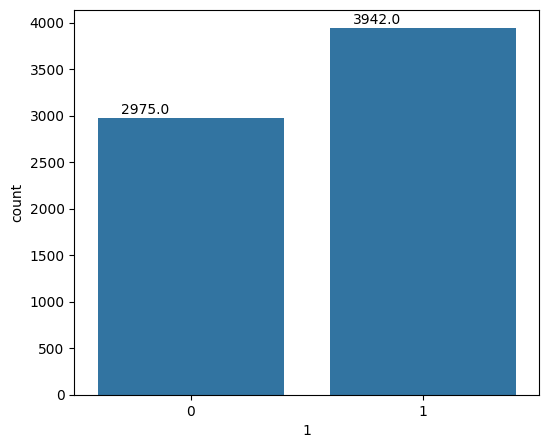

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
ax=sn.countplot(x='1',data=train_ds)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer()
feature_vector=count_vectorizer.fit(train_ds['The Da Vinci Code book is just awesome.'])
features=feature_vector.get_feature_names_out()
print("total number of features : ",len(features))

total number of features :  2132


In [19]:
import random
random.sample(sorted(features),10)

['aaron',
 'haha',
 'days',
 'nothing',
 'halloween',
 'genres',
 'night',
 'craze',
 'match',
 'nearly']

In [20]:
train_ds_features=count_vectorizer.transform(train_ds['The Da Vinci Code book is just awesome.'])
type(train_ds_features)

scipy.sparse._csr.csr_matrix

In [21]:
train_ds_features.shape

(6917, 2132)

In [22]:
train_ds_features.getnnz()

65390

In [23]:
print("density of the matrix: ",train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

density of the matrix:  0.44341089644812887


In [24]:
train_ds_df=pd.DataFrame(train_ds_features.todense())
train_ds_df.columns=features

In [25]:
train_ds[0:1]

,1,The Da Vinci Code book is just awesome.
0,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [28]:
train_ds_df.iloc[0:1,150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,0,0,0,0,0,0


In [29]:
train_ds_df[['the','da','vinci','code','book','is','just','awesome']][0:1]

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,0,0,0,0


In [30]:
feature_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts_df=pd.DataFrame(dict(features=features,counts=feature_counts))

Text(0, 0.5, 'density')

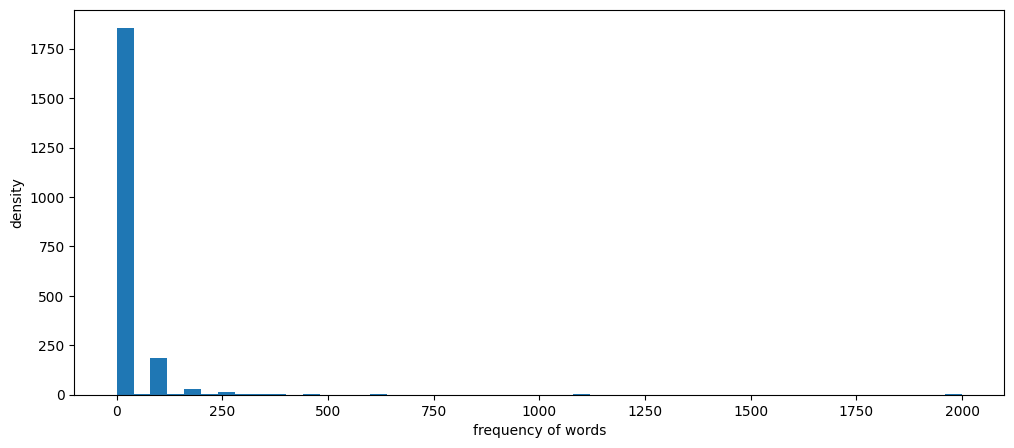

In [31]:
plt.figure(figsize=(12,5))
plt.hist(feature_counts_df.counts,bins=50,range=(0,2000))
plt.xlabel("frequency of words")
plt.ylabel("density")

In [33]:
len(feature_counts_df[feature_counts_df.counts==1])

1228

In [34]:
count_vectorizer=CountVectorizer(max_features=1000)
feature_vector=count_vectorizer.fit(train_ds['The Da Vinci Code book is just awesome.'])
features=feature_vector.get_feature_names_out()
train_ds_features=count_vectorizer.transform(train_ds['The Da Vinci Code book is just awesome.'])
feature_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=feature_counts))

In [35]:
feature_counts.sort_values('counts',ascending=False)[0:15]

,features,counts
858,the,3305
49,and,2154
379,harry,2093
705,potter,2093
150,code,2001
190,da,2000
926,vinci,2000
616,mountain,2000
116,brokeback,2000
576,love,1624


In [36]:
from sklearn.feature_extraction import text
my_stop_words=text.ENGLISH_STOP_WORDS

print("few stop words: ",list(my_stop_words)[0:10])

few stop words:  ['rather', 'bottom', 'that', 'they', 'hereupon', 'de', 'hers', 'once', 'would', 'ltd']
